# Connectivity in Graphs
This Python notebook goes over the content of `connectivity.pdf` in code for Recitation 3 of COMS 3251 Fall 2022 on Friday, September 23. Most of the main text of this notebook will be directly lifted from `connectivity.pdf`. The purpose of this notebook is just to provide a single document to work from during Recitation 3, as we'll also attempt to demonstrate some basic code for the cocnepts in this reading.

**NOTE:** There is unfortuantely no underlining in Markdown, so I will rely on ***bolded and italicized*** text to replace the lecture note convention of underlined, italicized text for definitions.

## Preliminaries
First, import the necessary libraries.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# This pip install is needed for networkx bug
!pip install decorator==5.0.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
moviepy 0.2.3.5 requires decorator<5.0,>=4.0.2, but you have decorator 5.0.9 which is incompatible.


In [ ]:
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML

## Graphs and Incidence Matrices
A ***graph*** is a tuple $(V, \mathcal{E})$, where $\mathcal{V}$ is a finite set, and $\mathcal{E} \subseteq \{\{u, v\} : u, v \in \mathcal{V}, u \not = v\}$ is a subset of undordered pairs of elements from $\mathcal{V}$. The elements of $\mathcal{V}$ are called ***vertices*** and the elements of $\mathcal{E}$ are called ***edges***. A graph models relationships between vertices.

For reasons that will become clear later, we will treat edges as ordered pairs. So every edge becomes a directed edge, where $(s,t)$ means "$s \rightarrow t$". We will denote the number of edges by $m = |\mathcal{E}|$ and the nubmer of vertices as $n = |\mathcal{V}|$. To simplify notation later, we let the vertices be the first $n$ positive integers $\mathcal{V} = \{1, \dots, n\}$, and we also arbitrarily label the edges $\{1, \dots, m\}$.

The ***(edge-vertex) incidence matrix*** $A$ for a graph is an $m \times n$ matrix, with rows corresponding to edges and columns corresponding to vertices, where:

$$
A =
\begin{cases}
-1 \text{ if edge $e$ starts at $v$,}\\
1 \text{ if edge $e$ ends at $v$,}\\
0 \text{ otherwise.}
\end{cases}
$$

We'll see that the graph-theoretic connectivity properties of a graph will have linear algebraic implications for its incidence matrix. Moreover, a linear algebraic algorithm that operates on this matrix will have a graph-theoretic interpretation.

In [ ]:
# Consider the following graph...
Image(url= "https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/connectivity_graph.png")

Throughout this notebook, we will be referring to the above graph in our running examples. The incidence matrix for this graph is:

$$
A =
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
0 & 0 & -1 & 1 \\
-1 & 0 & 0 & 1
\end{bmatrix}.
$$

In Python, there's a nice package library called `networkx` that allows you to make graphs quite easily.

In [ ]:
import networkx as nx

vertices = [1,2,3,4]
edges = [[1,2], [2,3], [1,3], [3,4], [1,4]] # remember, we have arbitrarily imposed a direction on each edge
G = nx.DiGraph() # "DiGraph" = "directed graph" = graph with directed edges.
G.add_nodes_from(vertices) # "nodes" = "vertices"
G.add_edges_from(edges)
A = np.array(nx.incidence_matrix(G, nodelist=vertices, edgelist=edges, oriented=True).T.todense())
print(A) # A here is a numpy array!

[[-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [-1.  0.  1.  0.]
 [ 0.  0. -1.  1.]
 [-1.  0.  0.  1.]]


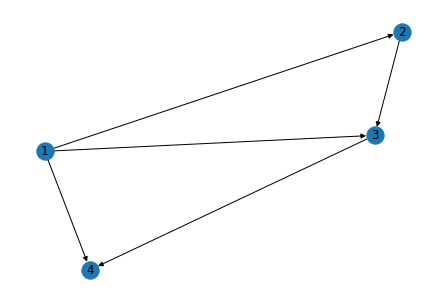

In [ ]:
nx.draw(G, with_labels=True)

## Potential Differences
Suppose we assign a value -- which we'll call a "potential" -- to each vertex in a graph. Such an assignment is described by an $n$-vector $\mathbf{x} = (x_1, \dots, x_n).$ The matrix-vector product $\mathbf{b} = (b_1, \dots, b_m) = A\mathbf{x}$ yields an $m$-vector in which $b_e$ is the ***potential difference*** across edge $e$. If edge $e$ is the ordered pair $(s,t)$, then:

$$b_e = \sum_{v \in \mathcal{V}} A_{e, v} x_v = x_t - x_s$$

We consider an example assignment of potentials to the vertices of $A$: 

$$\mathbf{x} = (2, 1, 3, 4).$$

In [ ]:
# Find the potential differences for the potential assignments x_1 and x_2
x = np.array([2, 1, 3, 4])

b = A@x
print("The potential differences for {} are: {}.".format(x, b))

The potential differences for [2 1 3 4] are: [-1.  2.  1.  1.  2.].


In [ ]:
# Find the potential difference across each edge of A
for edge in range(len(A)):
    s = np.where(A[edge] == -1)[0][0]
    t = np.where(A[edge] == 1)[0][0]
    print("Potential difference b_{} from vertex {} to vertex {} is: {}".format(edge+1, s+1, t+1, b[edge]))

Potential difference b_1 from vertex 1 to vertex 2 is: -1.0
Potential difference b_2 from vertex 2 to vertex 3 is: 2.0
Potential difference b_3 from vertex 1 to vertex 3 is: 1.0
Potential difference b_4 from vertex 3 to vertex 4 is: 1.0
Potential difference b_5 from vertex 1 to vertex 4 is: 2.0


In [ ]:
# Again, plot the image of the graph so we can see this:
Image(url= "https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/connectivity_graph.png")

Given the potential differences $\mathbf{b}$ and the incidence matrix $A$, is it possible to uniquely determine the potentials $\mathbf{x}$? No: the potential differences are the same if we increase the potential of every vertex by the same amount.

In [ ]:
# We can check this claim:
increased_x = x + np.array([2, 2, 2, 2])
print(increased_x)

increased_b = A@increased_x
print("The potential differences for {} are: {}.".format(increased_x, increased_b))
print("The potential differences for {} are: {}.".format(x, b))

[4 3 5 6]
The potential differences for [4 3 5 6] are: [-1.  2.  1.  1.  2.].
The potential differences for [2 1 3 4] are: [-1.  2.  1.  1.  2.].


In particular, if $\mathbf{x} = (c, \dots, c)$ for an scalar $c$, then $A \mathbf{x} = \mathbf{0}$. This shows that the columns of any incidence matrix $A$ are linearly dependent. In particular, $A$ has at most $n - 1$ linearly independent columns.

In [ ]:
# Try for a couple x's like this...
x1 = np.array([5, 5, 5, 5])
x2 = np.array([21, 21, 21, 21])
b1 = A@x1
b2 = A@x2

print("The potential differences for {} are: {}.".format(x1, b1))
print("The potential dfiferences for {} are: {}.".format(x2, b2))

The potential differences for [5 5 5 5] are: [0. 0. 0. 0. 0.].
The potential dfiferences for [21 21 21 21] are: [0. 0. 0. 0. 0.].


Since, in any matrix, the maximum number of linearly independent columns is the same as the maximum number of linearly independent rows (which we call the rank of the matrix), we know that the incidence matrix $A$ has at most $n - 1$ linearly independent rows. (Remember this for later!)

**Reason: Ax=0, that means some of the columns can be expressed as a linear combination of other columns. At most n-1, could have more columns.**

## Paths and Cycles
The incidence matrix $A$ was, in a sense, defined row-wise. What can we learn about the rows of $A$ from studying the graph structure? In this section, we look at the implications of the presence of paths and cycles.

A word of caution: we are going to extensively use row-wise matrix multiplication in this section (and the next one). Specifically, we will multiply a row vector (a $1 \times m$ matrix) by the incidence matrix (an $m \times n$ matrix) to produce another row vector (a $1 \times n$ matrix):

$$[y_1, \cdots y_m] \begin{bmatrix} \leftarrow \mathbf{a}_1^T \rightarrow \\ \vdots \\ \leftarrow \mathbf{a}_m^T \rightarrow \end{bmatrix} = y_1 \mathbf{a}_1^T + \cdots + y_m \mathbf{a}_m^T.$$

If you prefer, you can convert all row vectors into columns, and use the usual matrix-vector multilpication that you may be more used to. In the code below, however, we'll also be doing row-wise multiplication as above.

In [ ]:
# Example of row-wise matrix multiplication
ex_A = np.array([[1, 5, 2], 
                  [3, 4, 6]])
ex_y = np.array([[3, 4]])
row_wise = ex_y @ ex_A

print("Our example row vector is shape: {} x {}.".format(ex_y.shape[0], ex_y.shape[1]))
print("Our example matrix is shape: {} x {}.".format(ex_A.shape[0], ex_A.shape[1]))
print("The row-wise multiplication is shape: {} x {}.".format(row_wise.shape[0], row_wise.shape[1]))
print("Row-wise product: {}".format(row_wise))

Our example row vector is shape: 1 x 2.
Our example matrix is shape: 2 x 3.
The row-wise multiplication is shape: 1 x 3.
Row-wise product: [[15 31 30]]


We first consider the implication of a path in the graph.
Suppose there is a path from $s$ to $t$ in the graph, with $s \neq t$, and for now assume it respects the (arbitrarily determined) directions of the edges.
Then summing the rows of $A$ corresponding to these edges results in a row with $-1$ in component $s$, a $1$ in component $t$, and zeros elsewhere.
We specify the path using a row vector $\mathbf{y}^T$ with the appropriate coefficients from $\{0,1\}$ so that $\mathbf{y}^T A$ computes the sum of rows.

In [ ]:
# Again, plot the image of the graph so we can see this:
Image(url= "https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/connectivity_graph.png")

Consider the path from $s=1$ to $t=4$ using edges $1$, $2$, and $4$.
Adding these rows yields the desired row:

$$
\begin{bmatrix} 
1 & 1 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
0 & 0 & -1 & 1 \\
-1 & 0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix} 
-1 & 0 & 0 & 1
\end{bmatrix}.
$$

We write this in code below.

In [ ]:
# Path from s=1 to t=4 using edges 1, 2, 4.
path_1_4 = np.array([[1, 1, 0, 1, 0]])
sum_rows_1_4 = path_1_4 @ A

print("The sum of rows from s=1 to t=4: {}.".format(sum_rows_1_4))

The sum of rows from s=1 to t=4: [[-1.  0.  0.  1.]].


Suppose, now, that there is a path from $s$ to $t$, again with $s \neq t$, but only by using some edges in the "reverse direction".
We can again obtain the same row as above by linearly combining rows of $A$, but this time by adding the rows for edges used in the "forward direction", and then subtracting the rows for edges used in the "reverse direction".
We can think of this as scaling the rows for "reverse direction" edges by $-1$ before adding up the rows; the effect of the scaling is to flip the directions of these edges.
We call this the "signed path sum" of the rows corresponding to the edges in the path; it is also specified by a row vector $\mathbf{y}^T$ but now with coefficients in $\{-1,0,1\}$.

In [ ]:
# Again, plot the image of the graph so we can see this:
Image(url= "https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/connectivity_graph.png")

Consider the path from $s=2$ to $t=1$ using edges $2$, $4$, and $5$. Notice that edge 5 needs to be "reversed."
The signed path sum of these rows yields the desired row:

$$
\begin{bmatrix} 
0 & 1 & 0 & 1 & -1
\end{bmatrix}
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
0 & 0 & -1 & 1 \\
-1 & 0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix} 
1 & -1 & 0 & 0
\end{bmatrix}.
$$

We write this in code below.

In [ ]:
# Path from s=2 to t=1 using edges 2, 4, 5.
path_2_1 = np.array([[0, 1, 0, 1, -1]])
sum_rows_2_1 = path_2_1 @ A

print("The signed path sum of rows from s=2 to t=1: {}.".format(sum_rows_2_1))

The signed path sum of rows from s=2 to t=1: [[ 1. -1.  0.  0.]].


Now we consider the implication of a cycle in the graph.
By a cycle, we mean a path in the graph that starts and ends at the same vertex.
As above, we allow edges to be used in the "reverse direction".
Then, using the signed path sum of the rows corresponding to the path, we obtain the all-zeros row.
(What is the signed path sum if you remove one of the edges in the cycle?)


In [ ]:
# Again, plot the image of the graph so we can see this:
Image(url= "https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/connectivity_graph.png")

Consider the cycle starting (and ending) at $1$ uusing edges $1$, $2$, $4$, and $5$. Notice that edge 5 needs to be "reversed."
The signed path sum of these rows yields the all-zeros row:

$$
\begin{bmatrix} 
1 & 1 & 0 & 1 & -1
\end{bmatrix}
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
0 & 0 & -1 & 1 \\
-1 & 0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix} 
0 & 0 & 0 & 0
\end{bmatrix}.
$$

This indicates stability when put in the context of potential difference. If there is a cycle, it means the matrix is linear dependent.

We write this in code below.

In [ ]:
# Cycle from s=1 to t=1 using edges 1, 2, 4, 5.
cycle_1 = np.array([[1, 1, 0, 1, -1]])
sum_rows_1_1 = cycle_1 @ A

print("The signed path sum of rows from s=1 to t=1: {}.".format(sum_rows_1_1))

The signed path sum of rows from s=1 to t=1: [[0. 0. 0. 0.]].


Let's answer the question posed above using code: *What is the signed path sum if you remove one of the edges in the cycle?*

In [ ]:
# Cycle from s=1 to t=1 using edges 1, 2, 4, 5, remove edge 5:
cycle_1_mod5 = np.array([[1, 1, 0, 1, 0]])
sum_rows_1_1 = cycle_1_mod5 @ A

print("The signed path sum of rows from s=1 to t=1: {}.".format(sum_rows_1_1))

The signed path sum of rows from s=1 to t=1: [[-1.  0.  0.  1.]].


So, if the graph has a cycle, then the rows of the incidence matrix are linearly dependent, because we can linearly combine their rows to produce the all-zeros row in a non-trivial way.
Here is the contrapositive:

**Theorem 1.** **If the rows of the incidence matrix of a graph are linearly independent, then the graph is acyclic (i.e., has no cycles).**

Note: this theorem only works with the rows of the matrix. the columns of the matrix are used for information about the path.

together with the "at most n-1 linearly independent columns" fact, they can be used to do what??

## CR Factorization and acyclic subgraphs
Recall the algorithm that produces the CR factorization of a matrix $A$: it yields a matrix $C$ whose columns are a linearly independent subset of the columns of $A$, of maximum size, and a matrix $R$ that specifies how to obtain columns in $A$ as linear combinations of columns in $C$, such that $A = CR$.

Here's some code that'll do a CR factorization for you. There's no need, for now, to understand how `in_column_space` works. We'll return to this after learning about elimination.

In [ ]:
import sympy

def in_column_space(b, A):
  '''
  Checks for membership in a column space.

  Parameters:
  b : 1D array
    m-vector b
  A : 2D array
    m-by-n matrix

  Returns:
  t : bool
    membership status of b in column space of A
  x : ndarray or NoneType
    if t is True, then x is 1D array of coefficients that witnesses the membership
    if t is False, then x is None
  '''
  try:
    sol, params = sympy.Matrix(A).gauss_jordan_solve(sympy.Matrix(b))
  except ValueError:
    return (False, None)
  return (True, np.array(sol.xreplace({ f:0 for f in params })).astype(np.float64).flatten())

def greedy_cr(A):
  '''
  Greedy algorithm for CR factorization

  Parameter:
  A : 2D array
    m-by-n matrix

  Returns:
  C : 2D array
    linearly independent columns of A
  R : 2D array
    RREF matrix R such that A = CR
  '''
  C = np.ndarray((A.shape[0], 0))                        # initialize C to an m-by-0 matrix
  R = np.ndarray((0, 0))                                 # initialize R to a 0-by-0 matrix
  for k in range(A.shape[1]):
    (t, x) = in_column_space(A[:,k], C)                  # check if A[:,k] is in column space of C
    if t:
      R = np.column_stack((R, x))                        # append to R the column of coefficients witnessing membership of A[:,k] in column space of C
    else:
      C = np.column_stack((C, A[:,k]))                   # append to C the current column of A
      R = np.row_stack((R, np.zeros((1, R.shape[1]))))   # append to R a row of 0s
      R = np.column_stack((R, np.eye(C.shape[1])[:,-1])) # append to R a column where the last component is a 1 and other components are 0
  return C, R

Let us apply the same algorithm but now to the rows of $A$.
This means we apply the algorithm to the ***transpose*** of $A$, written $A^T$ (read aloud as "$A$ transpose").
To obtain the transpose of a matrix, turn every row of the matrix into a column, and then arrange these columns side-by-side in the same top-to-bottom order they were originally in as rows. In code, we simply write `A.T`, where `A` is the `numpy` array representing the matrix. The result is a "row-wise CR factorization" of $A$, which we write as

$$
  A^T \ = \ C R , \quad \text{or, equivalently,} \quad A \ = \ R^T C^T .
$$

The rows of $C^T$ are a linearly independent subset of rows of $A$, of maximum size, such that every row of $A$ is a linear combination of the rows in this extracted subset, as specified by the matrix $R^T$.
This subset of rows in $C^T$ corresponds to a subgraph of the original graph: it retains only a subset of the original edges.
By **Theorem 1** (above), the subgraph is acyclic.

In [ ]:
# Remember, the variable A still holds the incidence matrix
print(A)

[[-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [-1.  0.  1.  0.]
 [ 0.  0. -1.  1.]
 [-1.  0.  0.  1.]]


In [ ]:
# Perform CR decomposition on A.T
C, R = greedy_cr(A.T)

print("The shape of A.T is: {} x {}.".format(A.T.shape[0], A.T.shape[1]))
print("The shape of C is: {} x {}".format(C.shape[0], C.shape[1]))
print("The shape of R is: {} x {}".format(R.shape[0], R.shape[1]))

print("C (the matrix of linearly independent columns of A) is:\n {}".format(C))
print("R (how to reconstruct A from C's columns) is:\n {}".format(R))

The shape of A.T is: 4 x 5.
The shape of C is: 4 x 3
The shape of R is: 3 x 5
C (the matrix of linearly independent columns of A) is:
 [[-1.  0.  0.]
 [ 1. -1.  0.]
 [ 0.  1. -1.]
 [ 0.  0.  1.]]
R (how to reconstruct A from C's columns) is:
 [[1. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1.]
 [0. 0. 0. 1. 1.]]


In [ ]:
# Verify that we can reconstruct A.T and A from C and R
assert(np.array_equal(A.T, C@R))
assert(np.array_equal(A, R.T@C.T))

print("A.T = CR is: {}".format(np.array_equal(A.T, C@R)))
print("A = R.T C.T is: {}".format(np.array_equal(A, R.T@C.T)))

A.T = CR is: True
A = R.T C.T is: True


In [ ]:
# Show the subgraph
print("C.T represents an acyclic subgraph of A:\n {}".format(C.T))

C.T represents an acyclic subgraph of A:
 [[-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]


In [ ]:
# Verify visually that this is indeed an acyclic subgraph
Image(url= "https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/connectivity_graph.png")

**At this point of recitation:** We can also review going over the CR decomposition algorithm on $A^T$ if that helps.

## Connectivity
Finally, let us consider the implication of the connectedness of the graph.
Here, by ***connected***, we mean that there is a path between every pair of vertices.
Again, we allow paths to use edges in the "reverse direction".

If the graph is connected, then there is a path from vertex $1$ to every other vertex.
This means that each of the $n-1$ rows of the matrix $Z$, defined by

$$
Z =
\begin{bmatrix}
-1 & 1 & 0 & \dotsb & 0 \\
-1 & 0 & 1 & \dotsb & 0 \\
   & & & \vdots & \\
-1 & 0 & 0 & \dotsb & 1
\end{bmatrix},
$$

can be obtained by a signed path sum of the rows of $A$.
Therefore, connectivity implies that there is an $(n-1) \times m$ matrix $Y$ such that

$$YA = Z.$$

The $i$th row of $Y$ corresponds to a path that starts at vertex $1$ and ends at vertex $i+1$.
It is clear that the $n-1$ rows of this matrix $Z$ are linearly independent.
We are able to produce $n-1$ linearly independent rows using linear combinations of the rows of $A$.

Therefore, if we can find some matrix $Y$ such that $YA = Z$ for $Z$ defined above, then our graph can be said to be ***connected.*** Note that, in the example below, $Y$ is only one example of a matrix that represents how to reach the other vertices from $1$.

In [ ]:
# Using Y below, we show that the graph is connected
Y = np.array(
    [[0, -1, 0, -1, 1],
     [1, 1, 0, 0, 0],
     [0, 0, 1, 1, 0]])
Z = np.array(
    [[-1., 1., 0., 0.],
      [-1., 0., 1., 0.],
      [-1., 0., 0., 1.]])

assert(np.array_equal(Y@A, Z))
print("The {} x {} matrix YA\n {}".format((Y@A).shape[0], (Y@A).shape[1], Y@A))
print("should equal the {} x {} matrix Z:\n {}".format(Z.shape[0], Z.shape[1], Z))

The 3 x 4 matrix YA
 [[-1.  1.  0.  0.]
 [-1.  0.  1.  0.]
 [-1.  0.  0.  1.]]
should equal the 3 x 4 matrix Z:
 [[-1.  1.  0.  0.]
 [-1.  0.  1.  0.]
 [-1.  0.  0.  1.]]


Where in the graph are these paths?

In [ ]:
print("The path from 1 to 2 takes edges: {}".format(np.where(Y[0] != 0)[0] + 1))
print("The path from 1 to 3 takes edges: {}".format(np.where(Y[1] != 0)[0] + 1))
print("The path from 1 to 4 takes edges: {}".format(np.where(Y[2] != 0)[0] + 1))

The path from 1 to 2 takes edges: [2 4 5]
The path from 1 to 3 takes edges: [1 2]
The path from 1 to 4 takes edges: [3 4]


In [ ]:
Image(url= "https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/connectivity_graph.png")

Let us substitute the row-wise CR factorization of $A$ into $YA = Z$:

$$Y R^T C^T = Z ,$$

and think of $YR^T$ together as a single matrix, so the equation shows how to linearly combine the rows of $C^T$ to produce the rows of $Z$.

For the following paragraph, we need a **Key Fact** that follows from the Exchange Theorem (in the "Linear Dependence" lecture note). 

**Key Fact.** Let $\mathcal{E}$ and $\mathcal{W}$ be finite sets of vectors. If $\mathcal{W}$ is a linearly independent subset of $\mathrm{span}(\mathcal{E})$, then $|\mathcal{W}| \leq |\mathcal{E}|$.

If $k$ is the number of rows in $C^T$, then $Y R^T C^T = Z$ shows that the $n-1$ linearly independent rows of $Z$ are in the span of the $k$ linearly independent rows of $C^T$.
By the Exchange Theorem, we must have $n-1 \leq k$.
On the other hand, as you recall from the section above on **Potential Differences**, there are at most $n-1$ linearly independent rows of $A$.
Since rows of $C^T$ are a subset of the rows of $A$, we have $k \leq n-1$.
We conclude $k = n-1$.

In [ ]:
# Verify that the CR decomposition of A works for the connectivity equation:
print("R.T is {} x {} matrix:\n {}".format(R.T.shape[0], R.T.shape[1], R.T))
print("C.T is {} x {} matrix:\n {}".format(C.T.shape[0], C.T.shape[1], C.T))
print("YR.T can be taken as a {} x {} matrix:\n {}".format((Y @ R.T).shape[0], (Y @ R.T).shape[1], Y @ R.T))
print()

assert(np.array_equal(Y @ R.T @ C.T, Z))
print("(YR.T)C.T = Z is: {}".format(np.array_equal(Y @ R.T @ C.T, Z)))
print("We conclude that C.T has exactly {} linearly independent rows.".format(C.T.shape[0]))

R.T is 5 x 3 matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [0. 0. 1.]
 [1. 1. 1.]]
C.T is 3 x 4 matrix:
 [[-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]
YR.T can be taken as a 3 x 3 matrix:
 [[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]]

(YR.T)C.T = Z is: True
We conclude that C.T has exactly 3 linearly independent rows.


To summarize: if a graph is connected, then applying the row-wise CR factorization algorithm to its incidence matrix extracts an acyclic subgraph of the original graph of size exactly $n-1$.
Such a subgraph is a tree, and it is called a ***spanning tree*** of the original graph.
And the rank of the incidence matrix is exactly $n-1$ in this case.

In [ ]:
# View the acyclic subgraph given by C.T
print("C.T gives us the edges of the acyclic subgraph:\n {}".format(C.T))
Image(url= "https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/connectivity_graph.png")

C.T gives us the edges of the acyclic subgraph:
 [[-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]


In [ ]:
# Use networkx again to show the acyclic subgraph
vertices = [1,2,3,4]

# construct edges from C.T
edges = [] 
for edge in C.T:
    out = np.where(edge == -1)[0][0] + 1
    inc = np.where(edge == 1)[0][0] + 1
    edges.append([out, inc])
    
subG = nx.DiGraph() # "DiGraph" = "directed graph" = graph with directed edges.
subG.add_nodes_from(vertices) # "nodes" = "vertices"
subG.add_edges_from(edges)

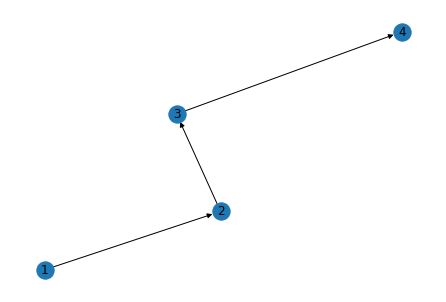

In [ ]:
# Draw the spanning tree
nx.draw(subG, with_labels=True)

## Disconnected Graphs
Suppose a graph has $p$ connected components, $p > 1$.
Say the components are $\mathcal{V}_1, \dotsc, \mathcal{V}_p$, where $\mathcal{V}_i \cap \mathcal{V}_j = \emptyset$ and $\mathcal{V}_1 \cup \dotsb \cup \mathcal{V}_p = \{1,\dotsc,n\}$.
For simplicity, assume $\mathcal{V}_1$ is the first $|\mathcal{V}_1|$ positive integers, $\mathcal{V}_2$ is the next $|\mathcal{V}_2|$ positive integers, and so on.
Then, it is possible to label the edges so that the incidence matrix $A$ for the graph has the "block diagonal" form

$$
  A = \left[
    \begin{array}{c|c|c}
      A_1 &
      \text{zeros} &
      \text{zeros} \\
      \hline
      \text{zeros} &
      \ddots &
      \text{zeros} \\
      \hline
      \text{zeros} &
      \text{zeros} &
      A_p
    \end{array}\right].
$$

Here, the submatrix $A_i$ is the incidence matrix for the $i$th component, and as argued above, it has $|\mathcal{V}_i| - 1$ linearly independent rows.
Note: it is possible that some of these blocks are empty (corresponding to components with a single vertex and no edges).
So the overall matrix $A$ has $\sum_{i=1}^p (|\mathcal{V}_i| - 1) = n - p$ linearly independent rows.
This is the rank of the matrix $A$.